## BERT Tutorial
### How to leverage BERT models for NLP use cases

<img src='https://towardsml.files.wordpress.com/2019/09/bert.png?w=1400' width=450>

#### A lot of available models - choose according to computational powers

Link: https://github.com/google-research/bert/

<img src='data/bert_models.png' width=600>


#### I will use DistilBert - smaller BERT that reaches similarly good performance level

DistilBert
- 66m parameters (Bert 110m)
- Layers / Hidden dimensions / Attention heads: 6 / 768 / 12 (BERT: 12 / 768 / 12)
- Performance: 97% of BERT

Complete documentation: https://huggingface.co/docs/transformers/model_doc/distilbert#distilbert (actually very user friendly)

In [1]:
import sys
import tensorflow as tf
from transformers import __version__ as transformers_version

print('Python version:', sys.version)
print('TensorFlow version:', tf.__version__)
print('Transformers version:', transformers_version)

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.8.0
Transformers version: 4.17.0


In [2]:
#!pip install transformers

from transformers import DistilBertTokenizer, TFDistilBertModel, TFDistilBertForSequenceClassification, pipeline

# tensorflow helpers
from tensorflow.keras.utils import plot_model

- DistilBertTokenizer: tokenizes input sequence
- DistilBertModel: creates embeddings on top of tokenized sequence (DistilBertTokenizer + training embeddings)
    - if using TensorFlow: TFDistilBertModel
- DistilBertForSequenceClassification: already builds a classifier on top of embeddings (DistilBertModel + classifier)
    - if using TensorFlow: TFDistilBertForSequenceClassification
- pipeline: DIY use cases    

## 1. Try out [MASK] performance

In [4]:
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForMaskedLM: ['activation_13']
- This IS expected if you are initializing TFDistilBertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertForMaskedLM were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForMaskedLM for predictions without further training.


In [5]:
unmasker('She wanted to go to [MASK].', top_k = 5)

[{'score': 0.10261128842830658,
  'token': 3637,
  'token_str': 'sleep',
  'sequence': 'she wanted to go to sleep.'},
 {'score': 0.0689050704240799,
  'token': 6014,
  'token_str': 'heaven',
  'sequence': 'she wanted to go to heaven.'},
 {'score': 0.05547206103801727,
  'token': 2793,
  'token_str': 'bed',
  'sequence': 'she wanted to go to bed.'},
 {'score': 0.029796143993735313,
  'token': 7173,
  'token_str': 'jail',
  'sequence': 'she wanted to go to jail.'},
 {'score': 0.024603210389614105,
  'token': 2267,
  'token_str': 'college',
  'sequence': 'she wanted to go to college.'}]

In [6]:
unmasker("I can't find my [MASK] .", top_k = 5)

[{'score': 0.045638371258974075,
  'token': 21714,
  'token_str': 'bearings',
  'sequence': "i can't find my bearings."},
 {'score': 0.029267502948641777,
  'token': 3042,
  'token_str': 'phone',
  'sequence': "i can't find my phone."},
 {'score': 0.024134928360581398,
  'token': 3437,
  'token_str': 'answer',
  'sequence': "i can't find my answer."},
 {'score': 0.023151494562625885,
  'token': 6998,
  'token_str': 'answers',
  'sequence': "i can't find my answers."},
 {'score': 0.0221986286342144,
  'token': 3611,
  'token_str': 'dad',
  'sequence': "i can't find my dad."}]

In [7]:
unmasker("I wish I had a [MASK].", top_k = 5)

[{'score': 0.0803658664226532,
  'token': 6898,
  'token_str': 'boyfriend',
  'sequence': 'i wish i had a boyfriend.'},
 {'score': 0.04185337573289871,
  'token': 3336,
  'token_str': 'baby',
  'sequence': 'i wish i had a baby.'},
 {'score': 0.03096265345811844,
  'token': 6513,
  'token_str': 'girlfriend',
  'sequence': 'i wish i had a girlfriend.'},
 {'score': 0.024552373215556145,
  'token': 3382,
  'token_str': 'chance',
  'sequence': 'i wish i had a chance.'},
 {'score': 0.02069612219929695,
  'token': 3959,
  'token_str': 'dream',
  'sequence': 'i wish i had a dream.'}]

In [8]:
unmasker("The black woman worked as a [MASK].")

[{'score': 0.13283893465995789,
  'token': 13877,
  'token_str': 'waitress',
  'sequence': 'the black woman worked as a waitress.'},
 {'score': 0.1258615255355835,
  'token': 6821,
  'token_str': 'nurse',
  'sequence': 'the black woman worked as a nurse.'},
 {'score': 0.1170877143740654,
  'token': 10850,
  'token_str': 'maid',
  'sequence': 'the black woman worked as a maid.'},
 {'score': 0.1149996891617775,
  'token': 19215,
  'token_str': 'prostitute',
  'sequence': 'the black woman worked as a prostitute.'},
 {'score': 0.04722743108868599,
  'token': 22583,
  'token_str': 'housekeeper',
  'sequence': 'the black woman worked as a housekeeper.'}]

In [9]:
unmasker("The white man worked as a [MASK].")

[{'score': 0.12353621423244476,
  'token': 20987,
  'token_str': 'blacksmith',
  'sequence': 'the white man worked as a blacksmith.'},
 {'score': 0.10142555087804794,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'the white man worked as a carpenter.'},
 {'score': 0.049850065261125565,
  'token': 7500,
  'token_str': 'farmer',
  'sequence': 'the white man worked as a farmer.'},
 {'score': 0.039325397461652756,
  'token': 18594,
  'token_str': 'miner',
  'sequence': 'the white man worked as a miner.'},
 {'score': 0.033517736941576004,
  'token': 14998,
  'token_str': 'butcher',
  'sequence': 'the white man worked as a butcher.'}]

In [10]:
unmasker("Black people are [MASK].")

[{'score': 0.05695762485265732,
  'token': 12421,
  'token_str': 'excluded',
  'sequence': 'black people are excluded.'},
 {'score': 0.03291214630007744,
  'token': 22216,
  'token_str': 'enslaved',
  'sequence': 'black people are enslaved.'},
 {'score': 0.032537490129470825,
  'token': 8135,
  'token_str': 'christians',
  'sequence': 'black people are christians.'},
 {'score': 0.026836352422833443,
  'token': 14302,
  'token_str': 'minorities',
  'sequence': 'black people are minorities.'},
 {'score': 0.017561400309205055,
  'token': 27666,
  'token_str': 'persecuted',
  'sequence': 'black people are persecuted.'}]

## 2. Get features (embeddings) of tokens

In [3]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer

PreTrainedTokenizer(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

return_tensors (`str` or [`~file_utils.TensorType`], *optional*):
        If set, will return tensors instead of list of python integers. Acceptable values are:

        - `'tf'`: Return TensorFlow `tf.constant` objects.
        - `'pt'`: Return PyTorch `torch.Tensor` objects.
        - `'np'`: Return Numpy `np.ndarray` objects.

In [4]:
model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [5]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.17.0",
  "vocab_size": 30522
}

In [6]:
model.summary()

Model: "tf_distil_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
Total params: 66,362,880
Trainable params: 66,362,880
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers[0].transformer.layer.layers

In [8]:
for i in model.layers[0].transformer.layer.layers[0].variables:
    print(i.name)

tf_distil_bert_model/distilbert/transformer/layer_._0/attention/q_lin/kernel:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/q_lin/bias:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/k_lin/kernel:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/k_lin/bias:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/v_lin/kernel:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/v_lin/bias:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/out_lin/kernel:0
tf_distil_bert_model/distilbert/transformer/layer_._0/attention/out_lin/bias:0
tf_distil_bert_model/distilbert/transformer/layer_._0/sa_layer_norm/gamma:0
tf_distil_bert_model/distilbert/transformer/layer_._0/sa_layer_norm/beta:0
tf_distil_bert_model/distilbert/transformer/layer_._0/ffn/lin1/kernel:0
tf_distil_bert_model/distilbert/transformer/layer_._0/ffn/lin1/bias:0
tf_distil_bert_model/distilbert/transformer/layer_._0/ffn/lin2/kernel:0
tf_dist

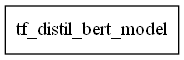

In [9]:
plot_model(model)

In [10]:
text = ["I went to the river bank and just laid there.", 
        "I work at an investment bank in New York.", 
        "Do you want to go with me to the bank?"]
encoded_input = tokenizer(text, return_tensors='tf', padding = True)

In [11]:
encoded_input

{'input_ids': <tf.Tensor: shape=(3, 13), dtype=int32, numpy=
array([[ 101, 1045, 2253, 2000, 1996, 2314, 2924, 1998, 2074, 4201, 2045,
        1012,  102],
       [ 101, 1045, 2147, 2012, 2019, 5211, 2924, 1999, 2047, 2259, 1012,
         102,    0],
       [ 101, 2079, 2017, 2215, 2000, 2175, 2007, 2033, 2000, 1996, 2924,
        1029,  102]])>, 'attention_mask': <tf.Tensor: shape=(3, 13), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])>}

In [12]:
encoded_input['input_ids']

<tf.Tensor: shape=(3, 13), dtype=int32, numpy=
array([[ 101, 1045, 2253, 2000, 1996, 2314, 2924, 1998, 2074, 4201, 2045,
        1012,  102],
       [ 101, 1045, 2147, 2012, 2019, 5211, 2924, 1999, 2047, 2259, 1012,
         102,    0],
       [ 101, 2079, 2017, 2215, 2000, 2175, 2007, 2033, 2000, 1996, 2924,
        1029,  102]])>

In [13]:
encoded_input['input_ids'].numpy()

array([[ 101, 1045, 2253, 2000, 1996, 2314, 2924, 1998, 2074, 4201, 2045,
        1012,  102],
       [ 101, 1045, 2147, 2012, 2019, 5211, 2924, 1999, 2047, 2259, 1012,
         102,    0],
       [ 101, 2079, 2017, 2215, 2000, 2175, 2007, 2033, 2000, 1996, 2924,
        1029,  102]])

In [14]:
encoded_input['attention_mask'].numpy()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

How does the tokenized text look like?

In [15]:
for i in range(encoded_input['input_ids'].shape[0]):
    print(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][i])) 

['[CLS]', 'i', 'went', 'to', 'the', 'river', 'bank', 'and', 'just', 'laid', 'there', '.', '[SEP]']
['[CLS]', 'i', 'work', 'at', 'an', 'investment', 'bank', 'in', 'new', 'york', '.', '[SEP]', '[PAD]']
['[CLS]', 'do', 'you', 'want', 'to', 'go', 'with', 'me', 'to', 'the', 'bank', '?', '[SEP]']


In [16]:
for i in range(encoded_input['input_ids'].shape[0]):
    print(len(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][i])) )

13
13
13


How is the output stored?

In [17]:
output = model(**encoded_input)

In [18]:
output[0].shape

TensorShape([3, 13, 768])

In [19]:
output[0][0].shape

TensorShape([13, 768])

In [20]:
output[0][1].shape

TensorShape([13, 768])

In [21]:
output[0][2].shape

TensorShape([13, 768])

In [22]:
# can convert to numpy
output[0][0].numpy().shape

(13, 768)

Words with multiple meanings

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [24]:
bank_river = output[0][0][6]
bank_financial = output[0][1][6]
bank_universal = output[0][2][10]

In [25]:
bank_matrix = np.concatenate((bank_river.numpy().reshape(1, 768), 
                              bank_financial.numpy().reshape(1, 768), 
                              bank_universal.numpy().reshape(1, 768)))

In [26]:
pd.DataFrame(cosine_similarity(bank_matrix), 
             columns=['River', 'Investment', 'Universal'],
             index=['River', 'Investment', 'Universal'])

,River,Investment,Universal
River,1.000000,0.688735,0.770934
Investment,0.688735,1.000000,0.836289
Universal,0.770934,0.836289,1.000000


In [27]:
text = ["My date went great last night!", 
        "What's today's date?", 
        "This date is too sour to eat."]
encoded_input = tokenizer(text, return_tensors='tf', padding = True)

for i in range(encoded_input['input_ids'].shape[0]):
    print(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][i])) 
    
output = model(**encoded_input)

date_rel = output[0][0][2]
date_time = output[0][1][7]
date_food = output[0][2][2]

date_matrix = np.concatenate((date_rel.numpy().reshape(1, 768), 
                              date_time.numpy().reshape(1, 768), 
                              date_food.numpy().reshape(1, 768)))

pd.DataFrame(cosine_similarity(date_matrix), 
             columns=['Relationship', 'Calendar', 'Food'],
             index=['Relationship', 'Calendar', 'Food'])

['[CLS]', 'my', 'date', 'went', 'great', 'last', 'night', '!', '[SEP]', '[PAD]']
['[CLS]', 'what', "'", 's', 'today', "'", 's', 'date', '?', '[SEP]']
['[CLS]', 'this', 'date', 'is', 'too', 'sour', 'to', 'eat', '.', '[SEP]']


,Relationship,Calendar,Food
Relationship,1.000000,0.825439,0.743566
Calendar,0.825439,1.000000,0.771033
Food,0.743566,0.771033,1.000000


## 3. Sentiment classification without fine tuning --> embeddings + logit

<img src='https://jalammar.github.io/images/distilBERT/bert-distilbert-sentence-classification-example.png' width=800>


In [28]:
# already loaded
# import tensorflow as tf
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

In [29]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                 delimiter='\t', header=None)
df.columns = ['review', 'label']

df.head()

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


#### 1. Tokenization

In [30]:
%%time 
tokenized = df['review'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

Wall time: 5.53 s


In [31]:
print('Max length:', tokenized.map(len).max())
print('Median length:', tokenized.map(len).median())
print('Mean length:', tokenized.map(len).mean())

Max length: 67
Median length: 22.0
Mean length: 23.341907514450867


Use tokenizer function that creates padded embeddings and outputs attention masks (what to consider, what not to consider)

In [32]:
MAX_LEN = 30

def bert_tokenizer(text):
    
    encoded_text = tokenizer.encode_plus(text,  max_length = MAX_LEN, truncation=True,  padding='max_length',  
                                         return_attention_mask=True, return_tensors='tf')
    
    return encoded_text['input_ids'][0].numpy(), encoded_text['attention_mask'][0].numpy()

In [33]:
bert_tokenizer('Sample test that will be padded')

(array([  101,  7099,  3231,  2008,  2097,  2022, 20633,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]))

In [34]:
%%time

tokenized_padded, attention_masks = zip(*df['review'].apply(lambda x: bert_tokenizer(x)))

Wall time: 18.7 s


In [35]:
input_ids = tf.convert_to_tensor(tokenized_padded)
attention_mask = tf.convert_to_tensor(attention_masks)

# input_ids = tf.stop_gradient(input_ids) # requires_grad=False in torch
# attention_mask = tf.stop_gradient(attention_mask)

print(input_ids.shape)
print(attention_mask.shape)

(6920, 30)
(6920, 30)


#### 2. Apply BERT on tokens

In [36]:
%%time
last_hidden_states = model(input_ids, attention_mask=attention_mask)

Wall time: 17min 6s


In [39]:
last_hidden_states[0].shape

TensorShape([6920, 30, 768])

6920 sentences, 30 words (tokens) in each sentence, 768 dimensions for each word (token)

#### 3. Get sentence embeddings out of the resuling tensor


<img src='https://camo.githubusercontent.com/6c2185c7620a3fe52f1968752febb6467723f4485c257442d3b0ed03bb0da197/68747470733a2f2f6a616c616d6d61722e6769746875622e696f2f696d616765732f64697374696c424552542f626572742d6f75747075742d74656e736f722d73656c656374696f6e2e706e67' width=1000>


In [48]:
X = last_hidden_states[0][:,0,:].numpy()
y = df['label']

print(X.shape)
print(y.shape)

(6920, 768)
(6920,)


#### 4. Fit model, evaluate

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 91, train_size = 0.8)

In [51]:
logit = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

In [52]:
y_pred_class = logit.predict(X_test)
y_pred_prob = logit.predict_proba(X_test)[:, 1]

In [53]:
print('Ratio of positive class:', y.value_counts()[1] / df.shape[0])
print('Accuracy:', accuracy_score(y_test, y_pred_class))
print('AUC:', roc_auc_score(y_test, y_pred_prob))

Ratio of positive class: 0.5216763005780347
Accuracy: 0.8345375722543352
AUC: 0.9162513712584235


#### 5. Predict sentiment of any text

In [54]:
def predict_sentiment(text):
    
    _tokenized, _attention_mask = bert_tokenizer(text)

    _tokenized = _tokenized.reshape(1, 30)
    _attention_mask = _attention_mask.reshape(1, 30)
    _last_hidden_state = model(_tokenized, attention_mask = _attention_mask)
    _X = _last_hidden_state[0][:,0,:][0].numpy().reshape(1, -1)

    #predicted_class = logit.predict(_X)[0]
    predicted_proba = logit.predict_proba(_X)[:, 1][0]

    return print('Probability of being positive:', predicted_proba)

In [55]:
text = 'I though the movie was going to suck, but actually it turned out to be really good.'
predict_sentiment(text)

Probability of being positive: 0.4586779717366192


In [56]:
text = 'Overall OK, nothing special'
predict_sentiment(text)

Probability of being positive: 0.2109336851428714


In [57]:
text = 'Liked it'
predict_sentiment(text)

Probability of being positive: 0.848766450385643


In [58]:
text = 'What a fucking amazing picture'
predict_sentiment(text)

Probability of being positive: 0.6149149887169926


In [59]:
text = 'What a fucking amazing picture!'
predict_sentiment(text)

Probability of being positive: 0.6892585731842714


## 4.  Sentiment classification with fine tuning --> BERT in neural net (`TFDistilBertForSequenceClassification`)

<img src='https://skimai.com/wp-content/uploads/2020/03/Screen-Shot-2020-04-13-at-5.59.33-PM.png' width=800>


### 1. Create TF datasets
- Tokenization
- TF spedicif dataloaders

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], random_state = 91, train_size = 0.8)

In [71]:
MAX_LEN = 30

def bert_tokenizer(text):    
    encoded_text = tokenizer(text,  max_length = MAX_LEN, truncation=True,  padding='max_length', return_attention_mask=True, return_tensors='tf')    
    return encoded_text

def construct_tfdataset(encoded_text, y = None):    
    if y:
        return tf.data.Dataset.from_tensor_slices((dict(encoded_text),y))
    else: # for testing / new samples
        return tf.data.Dataset.from_tensor_slices(dict(encoded_text))

In [69]:
dict(bert_tokenizer('hello there')).keys()

dict_keys(['input_ids', 'attention_mask'])

In [73]:
%%time
X_train_encodings = bert_tokenizer(X_train.tolist())
X_test_encodings = bert_tokenizer(X_test.tolist())

Wall time: 6.19 s


In [97]:
%%time
BATCH_SIZE = 500
train = construct_tfdataset(X_train_encodings, y_train.tolist()).batch(BATCH_SIZE)
test = construct_tfdataset(X_test_encodings, y_test.tolist()).batch(BATCH_SIZE)

Wall time: 32 ms


### 2. Import and compile BERT model for sequence classification

In [86]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_38']
You should probably TRAIN this model on a down-stream task to be able to use i

In [89]:
optimizer = tf.optimizers.Adam(learning_rate=3e-5)
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [90]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_38 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


### 3. Fine tune model

Don't want to train the BERT layer due to resources

In [94]:
model.layers[0].trainable = False

In [98]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_38 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 592,130
Non-trainable params: 66,362,880
_________________________________________________________________


In [99]:
N_EPOCHS = 2
model.fit(train, batch_size = BATCH_SIZE, epochs = N_EPOCHS, workers = 4)

Epoch 1/2
12/12 [==============================] - 1145s 94s/step - loss: 0.6482 - accuracy: 0.6404
Epoch 2/2
12/12 [==============================] - 1150s 96s/step - loss: 0.4322 - accuracy: 0.8293


### 4. Evaluate and make new predictions

In [100]:
test_eval = model.evaluate(test, return_dict = True, batch_size = BATCH_SIZE)
print(test_eval)

3/3 [==============================] - 60s 19s/step - loss: 0.3639 - accuracy: 0.8432
{'loss': 0.3639087677001953, 'accuracy': 0.8432080745697021}


After **2 epochs** while **BERT layer was frozen**, test accuracy **beat logit by 2%points**

In [112]:
def sentiment_prediction(text):
    
    x = [text]

    encodings = bert_tokenizer(x)
    tfdataset = construct_tfdataset(encodings)
    tfdataset = tfdataset.batch(1)

    preds = model.predict(tfdataset).logits
    preds = tf.keras.activations.softmax(tf.convert_to_tensor(preds)).numpy()
    
    return preds[0][1]

In [121]:
sentiment_prediction('This movie sucked ass')

0.1069365

In [123]:
sentiment_prediction('This movie defines the golden standard')

0.8545717

In [124]:
sentiment_prediction('I have never seen such a terrific picture')

0.8001689

In [125]:
sentiment_prediction('I have never seen such a terrible picture')

0.18013132

In [128]:
sentiment_prediction('Wouldnt really watch it again')

0.16001002

## 5. Sentiment classification with fine tuning --> BERT in neural net (`TFDistilBertModel`)

`TFDistilBertForSequenceClassification` already has a classification structure. With `TFDistilBertModel` we just get the BERT layer (transformer layer) for which we need to define:

1. input
    - token IDs
    - attention masks
2. classifier head (or multiple layers) and it's activation depending on the # of classes
3. any additional layers (dropouts, dense connections, etc...)